### Set up


In [18]:
library(shiny)
library(vroom)
library(tidyverse)

In [ ]:

dir.create("neiss")
#> Warning in dir.create("neiss"): 'neiss' already exists
download <- function(name) {
  url <- "https://raw.github.com/hadley/mastering-shiny/main/neiss/"
  download.file(paste0(url, name), paste0("neiss/", name), quiet = TRUE)
}
download("injuries.tsv.gz")
download("population.tsv")
download("products.tsv")

In [19]:
injuries <- vroom::vroom("neiss/injuries.tsv.gz")
head(injuries)

Rows: 255064 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): sex, race, body_part, diag, location, narrative
dbl  (3): age, prod_code, weight
date (1): trmt_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


trmt_date,age,sex,race,body_part,diag,location,prod_code,weight,narrative
<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2017-01-01,71,male,white,Upper Trunk,Contusion Or Abrasion,Other Public Property,1807,77.6641,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION
2017-01-01,16,male,white,Lower Arm,"Burns, Thermal",Home,676,77.6641,"16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACEDX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM"
2017-01-01,58,male,white,Upper Trunk,Contusion Or Abrasion,Home,649,77.6641,"58 YOM WENT TO BATHROOM; LOST HIS BALANCE, FELL TO FLOOR HIT UPPER BACK ON TOILET. CONTUSION OF UPPER BACK."
2017-01-01,21,male,white,Lower Trunk,"Strain, Sprain",Home,4076,77.6641,"21 YOM TURNED WRONG AS HE GOT OUT OF BED. TWISTED LOWER BACK. STRAIN, LOWER BACK. (ACUTE EXACERBATION OF LOW BACK DISORDER)"
2017-01-01,54,male,white,Head,Inter Organ Injury,Other Public Property,1807,77.6641,54 YOM WAS FOUND ON FLOOR OF NURSING HOME WHERE HE RESIDES; HAD FALLEN TO THE FLOOR. SUBDURAL HEMATOMA.
2017-01-01,21,male,white,Hand,Fracture,Home,1884,77.6641,"21 YOM HIT WALL IN ANGER; HAD RESULTANT PAIN OF RT. HAND. .FX, RT. HAND"


In [20]:
products <- vroom::vroom("neiss/products.tsv")
head(products)

Rows: 38 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): title
dbl (1): prod_code



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


prod_code,title
<dbl>,<chr>
464,"knives, not elsewhere classified"
474,tableware and accessories
604,"desks, chests, bureaus or buffets"
611,bathtubs or showers
649,toilets
676,"rugs or carpets, not specified"


In [17]:

population <- vroom::vroom("neiss/population.tsv")
head(population)

Rows: 170 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): sex
dbl (2): age, population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,population
<dbl>,<chr>,<dbl>
0,female,1924145
0,male,2015150
1,female,1943534
1,male,2031718
2,female,1965150
2,male,2056625



### input


In [34]:
products$title

[1] "knives, not elsewhere classified"        
 [2] "tableware and accessories"               
 [3] "desks, chests, bureaus or buffets"       
 [4] "bathtubs or showers"                     
 [5] "toilets"                                 
 [6] "rugs or carpets, not specified"          
 [7] "sofas, couches, davenports, divans or st"
 [8] "containers, not specified"               
 [9] "sports or recreational activity, n.e.c." 
[10] "basketball (activity, apparel or equip.)"
[11] "football (activity, apparel or equip.)"  
[12] "trampolines"                             
[13] "slides or sliding boards"                
[14] "monkey bars or other playground climbing"
[15] "soccer (activity, apparel or equip.)"    
[16] "skateboards"                             
[17] "footwear"                                
[18] "jewelry"                                 
[19] "floors or flooring materials"            
[20] "porches, balconies, open-side floors or" 
[21] "nails, screws, tacks or bolts"           
[22] "stairs or steps"                         
[23] "fences or fence posts"                   
[24] "ceilings and walls (part of completed st"
[25] "doors, other or not specified"           
[26] "windows & window glass, excl storm windo"
[27] "weight lifting (activity, apparel or equ"
[28] "swimming (activity, apparel or equipment"
[29] "exercise (activity or apparel, w/o equip"
[30] "furniture, not specified"                
[31] "cabinets, racks, room dividers and shelv"
[32] "tables, not elsewhere classified"        
[33] "chairs, other or not specified"          
[34] "beds or bedframes, other or not spec"    
[35] "ladders, other or not specified"         
[36] "softball (activity, apparel or equipment"
[37] "bicycles and accessories (excl mountain" 
[38] "baseball (activity, apparel or equipment"

In [31]:
product = "tables, not elsewhere classified"

In [33]:
prod_code = products[products$title == product,"prod_code"] %>% as.numeric()
prod_code

[1] 4057

### process & results

In [35]:
selected <- injuries %>% filter(prod_code == {{prod_code}})
nrow(selected)

[1] 7712

In [36]:
selected %>% count(location, wt = weight, sort = TRUE)

location,n
<chr>,<dbl>
Home,189305.0388
Unknown,52073.8667
Other Public Property,17626.1720
School,9651.6848
Sports Or Recreation Place,2047.0008
Street Or Highway,304.7292
Farm,16.1828
Mobile Home,4.7570


In [37]:
selected %>% count(body_part, wt = weight, sort = TRUE)

body_part,n
<chr>,<dbl>
Head,70423.9628
Face,59505.3961
Upper Trunk,18919.9368
Mouth,13889.8137
Lower Trunk,13816.5056
Toe,11480.8884
Foot,11063.4985
Hand,10099.0800
Lower Leg,9118.8064


In [38]:
selected %>% count(diag, wt = weight, sort = TRUE)

diag,n
<chr>,<dbl>
Laceration,94510.3959
Contusion Or Abrasion,48864.9028
Inter Organ Injury,37798.0364
Fracture,30523.4670
Other Or Not Stated,26447.5591
"Strain, Sprain",12033.5239
Hematoma,5816.0777
Concussion,3752.2033
Avulsion,2670.9802


In [39]:
summary <- selected %>% 
  count(age, sex, wt = weight)
head(summary)

age,sex,n
<dbl>,<chr>,<dbl>
0,female,2279.674
0,male,3934.223
1,female,8225.368
1,male,14114.770
2,female,7622.759
2,male,13765.569


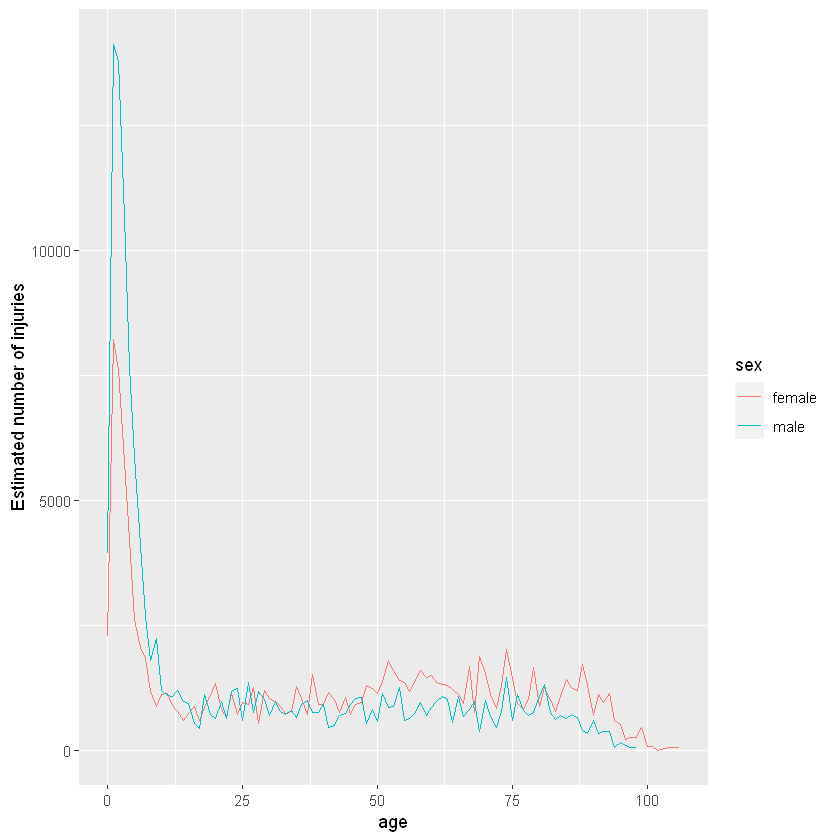

In [40]:
summary %>% 
  ggplot(aes(age, n, colour = sex)) + 
  geom_line() + 
  labs(y = "Estimated number of injuries")


In [41]:
summary <- selected %>% 
  count(age, sex, wt = weight) %>% 
  left_join(population, by = c("age", "sex")) %>% 
  mutate(rate = n / population * 1e4)

head(summary)

age,sex,n,population,rate
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
0,female,2279.674,1924145,11.84772
0,male,3934.223,2015150,19.52323
1,female,8225.368,1943534,42.32171
1,male,14114.770,2031718,69.47209
2,female,7622.759,1965150,38.78971
2,male,13765.569,2056625,66.93281


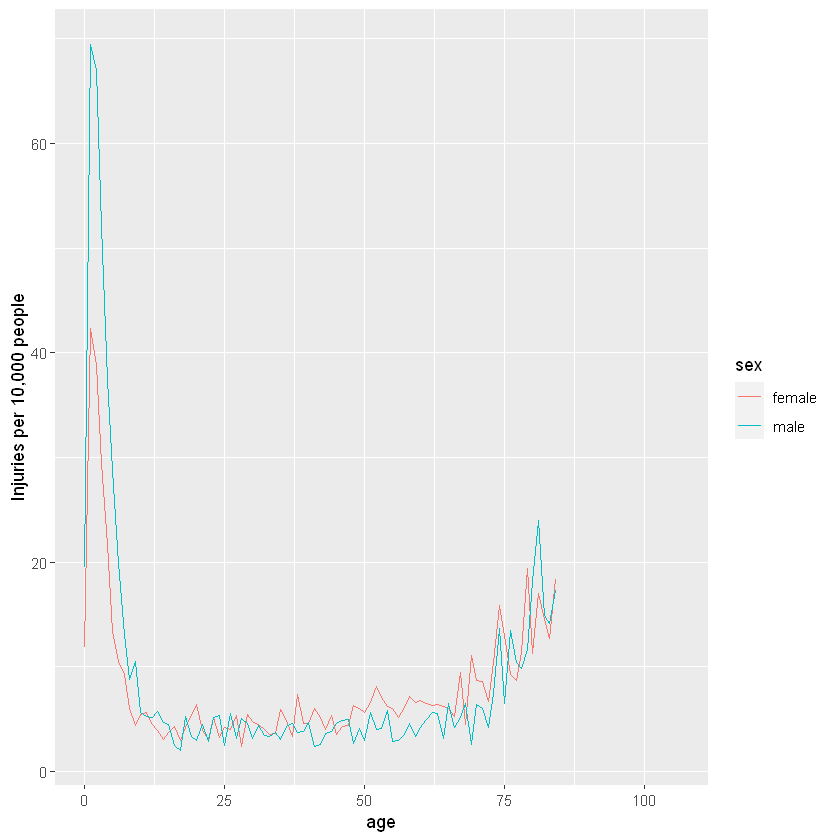

In [42]:
summary %>% 
  ggplot(aes(age, rate, colour = sex)) + 
  geom_line(na.rm = TRUE) + 
  labs(y = "Injuries per 10,000 people")